In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm

In [2]:
data=pd.read_csv("CCC_Data.csv")
data


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
#DATA CLEANING

In [4]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
data.drop_duplicates()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [6]:
data.T.drop_duplicates().T

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [7]:
#ENCODING

In [8]:
X=data.iloc[:,2:7]
X

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [9]:
import sklearn.preprocessing as sp
s_s= sp.StandardScaler()

In [10]:
a=list[X.columns]
a

list[Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')]

In [11]:
from sklearn.compose import make_column_transformer
trans_X=make_column_transformer((s_s,a))
trans_X

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 list[Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')])])

In [12]:
processed_X= trans_X.fit_transform(X)
processed_X

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [13]:
pd.DataFrame(processed_X)

,0,1,2,3,4
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score=[]
k_list=[]
inertia=[]
group=1
for k in range (2,20):
    model=KMeans(n_clusters=k)
    labels=model.fit_predict(processed_X)
    score.append(silhouette_score(processed_X,labels))
    inertia.append(model.inertia_)
    k_list.append(k)
    group=group+1

In [15]:
result=pd.DataFrame({"K":k_list,"score":score,"inertia": inertia})
result

,K,score,inertia
0,2,0.418425,2040.989816
1,3,0.515718,933.043749
2,4,0.355667,780.773690
3,5,0.271784,704.780050
4,6,0.255450,642.149071
5,7,0.248084,600.291135
6,8,0.223367,570.080895
7,9,0.227457,536.312984
8,10,0.214991,512.198406
9,11,0.217009,483.534256


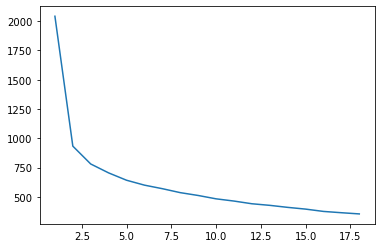

In [16]:

plt.plot(range(1,group),inertia)

In [17]:
k=3
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(np.c_[processed_X])
y_pred
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,0
4,2
...,...
655,2
656,2
657,2
658,2


In [18]:
cluster=X
cluster["label"]=y_pred
cluster

C:\Users\Taqdees\AppData\Local\Temp/ipykernel_8076/308387126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster["label"]=y_pred


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


In [20]:
d=cluster['label'].value_counts()
d


0    386
1    224
2     50
Name: label, dtype: int64

In [43]:
label=cluster["label"].unique()
label

array([0, 1, 2])

In [39]:
label_0=cluster[cluster['label']==0].mean()
(label_0)

Avg_Credit_Limit       33782.383420
Total_Credit_Cards         5.515544
Total_visits_bank          3.489637
Total_visits_online        0.981865
Total_calls_made           2.000000
label                      0.000000
dtype: float64

In [28]:
label_1=cluster[cluster['label']==1].mean()
label_1

Avg_Credit_Limit       12174.107143
Total_Credit_Cards         2.410714
Total_visits_bank          0.933036
Total_visits_online        3.553571
Total_calls_made           6.870536
label                      1.000000
dtype: float64

In [29]:
label_2=cluster[cluster['label']==2].mean()
label_2

Avg_Credit_Limit       141040.00
Total_Credit_Cards          8.74
Total_visits_bank           0.60
Total_visits_online        10.90
Total_calls_made            1.08
label                       2.00
dtype: float64

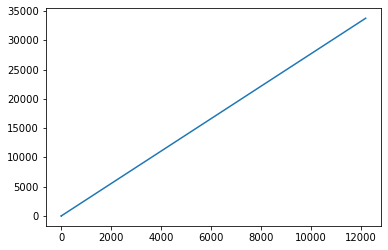

In [47]:
plt.plot(label_1,label_0)